In [2]:
import pandas as pd

shoes = pd.read_csv('StockX-Data-Contest-2019.csv')

# get rid of any dollar sign and commas in price and convert to float to divide
shoes['Sale Price'] = shoes['Sale Price'].str.replace('[\$\,]|\.\d*', '').astype('float')
shoes['Retail Price'] = shoes['Retail Price'].str.replace('[\$\,]|\.\d*', '').astype('float')

# Create a "Price Ratio" feature (SalePrice / RetailPrice = Price Ratio)
shoes['Price Ratio'] = shoes['Sale Price'] / shoes['Retail Price']

# Convert dates to pandas datetime
shoes['Order Date'] = pd.to_datetime(shoes['Order Date'])
shoes['Release Date'] = pd.to_datetime(shoes['Release Date'])

print(shoes.head())

/var/folders/y3/dlgpd0s57gx2x8t7lwlrczdm0000gn/T/ipykernel_1266/3661913538.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  shoes['Sale Price'] = shoes['Sale Price'].str.replace('[\$\,]|\.\d*', '').astype('float')
/var/folders/y3/dlgpd0s57gx2x8t7lwlrczdm0000gn/T/ipykernel_1266/3661913538.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  shoes['Retail Price'] = shoes['Retail Price'].str.replace('[\$\,]|\.\d*', '').astype('float')


  Order Date   Brand                                   Sneaker Name  \
0 2017-09-01   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1 2017-09-01   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2 2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3 2017-09-01   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4 2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

   Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  Price Ratio  
0      1097.0         220.0   2016-09-24       11.0    California     4.986364  
1       685.0         220.0   2016-11-23       11.0    California     3.113636  
2       690.0         220.0   2016-11-23       11.0    California     3.136364  
3      1075.0         220.0   2016-11-23       11.5      Kentucky     4.886364  
4       828.0         220.0   2017-02-11       11.0  Rhode Island     3.763636  


In [3]:
# Create new features for popular words in shoe names and regions
# Create words in names features
words_in_names = set()
for name in shoes['Sneaker Name']:
    split_name = name.split('-')
    words_in_names.update(split_name)
print(words_in_names)
for word in words_in_names:
    shoes[word] = shoes['Sneaker Name'].apply(lambda x: 1 if word in x else 0)

# Create buyer region features
unique_region = list(shoes['Buyer Region'].unique())
for region in unique_region:
    shoes[region] = shoes['Buyer Region'].apply(lambda x: 1 if x == region else 0)

shoes.drop('Buyer Region', axis=1, inplace=True)
shoes.drop('Sneaker Name', axis=1, inplace=True)
shoes.drop('Brand', axis=1, inplace=True)

print(shoes.head(4))

{'2015', 'Flyknit', 'Beluga', 'Cream', 'Grim', 'Semi', 'Zebra', 'AF100', 'White', 'Elemental', '90', 'React', 'Retro', 'Air', '2017', 'Static', 'High', 'Black', 'Sesame', 'adidas', 'Oxford', 'Volt', 'Silver', 'Red', 'Off', 'Copper', 'Zoom', 'Orange', 'Virgil', 'Low', 'Core', 'Presto', 'Fly', 'Chicago', 'Adidas', 'Hyperdunk', '350', 'University', 'Yeezy', 'All', 'Green', 'VaporMax', '2pt0', 'Jordan', 'Desert', 'Frozen', 'Tint', 'Abloh', '2016', 'Pirate', 'Reflective', 'Menta', '2018', 'Ore', 'Tan', 'Reaper', 'Turtledove', 'Rose', 'Max', '1', 'Pink', 'Yellow', 'Blazer', 'Boost', 'Mercurial', 'Moonrock', 'Force', 'Total', 'Mid', 'Hallows', 'Grey', '97', 'Wolf', 'Butter', 'V2', 'Queen', 'Nike', 'Eve', 'Blue'}


/var/folders/y3/dlgpd0s57gx2x8t7lwlrczdm0000gn/T/ipykernel_1266/4010923137.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shoes[region] = shoes['Buyer Region'].apply(lambda x: 1 if x == region else 0)
/var/folders/y3/dlgpd0s57gx2x8t7lwlrczdm0000gn/T/ipykernel_1266/4010923137.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shoes[region] = shoes['Buyer Region'].apply(lambda x: 1 if x == region else 0)
/var/folders/y3/dlgpd0s57gx2x8t7lwlrczdm0000gn/T/ipykernel_1266/4010923137.py:14: PerformanceWarning: DataFrame is highl

  Order Date  Sale Price  Retail Price Release Date  Shoe Size  Price Ratio  \
0 2017-09-01      1097.0         220.0   2016-09-24       11.0     4.986364   
1 2017-09-01       685.0         220.0   2016-11-23       11.0     3.113636   
2 2017-09-01       690.0         220.0   2016-11-23       11.0     3.136364   
3 2017-09-01      1075.0         220.0   2016-11-23       11.5     4.886364   

   2015  Flyknit  Beluga  Cream  ...  New Hampshire  Vermont  \
0     0        0       1      0  ...              0        0   
1     0        0       0      0  ...              0        0   
2     0        0       0      0  ...              0        0   
3     0        0       0      0  ...              0        0   

   District of Columbia  Hawaii  New Mexico  South Dakota  Mississippi  \
0                     0       0           0             0            0   
1                     0       0           0             0            0   
2                     0       0           0             0    

Preparing data
TODO: Make sure all features are number based and between [0, 1]

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

X = shoes.copy()
# Remove target
y = X.pop('Price Ratio')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [133]


In [5]:
# Uncomment to see original data
print(shoes.head())
# Uncomment to see processed features
print(pd.DataFrame(X[:10,:]).head())

  Order Date  Sale Price  Retail Price Release Date  Shoe Size  Price Ratio  \
0 2017-09-01      1097.0         220.0   2016-09-24       11.0     4.986364   
1 2017-09-01       685.0         220.0   2016-11-23       11.0     3.113636   
2 2017-09-01       690.0         220.0   2016-11-23       11.0     3.136364   
3 2017-09-01      1075.0         220.0   2016-11-23       11.5     4.886364   
4 2017-09-01       828.0         220.0   2017-02-11       11.0     3.763636   

   2015  Flyknit  Beluga  Cream  ...  New Hampshire  Vermont  \
0     0        0       1      0  ...              0        0   
1     0        0       0      0  ...              0        0   
2     0        0       0      0  ...              0        0   
3     0        0       0      0  ...              0        0   
4     0        0       0      0  ...              0        0   

   District of Columbia  Hawaii  New Mexico  South Dakota  Mississippi  \
0                     0       0           0             0         

In [104]:
# Create training and validation splits
df_train = shoes.sample(frac=0.7, random_state=0)  # frac is the fraction of the data set to use
df_valid = shoes.drop(df_train.index)  # drops (slices) the training data from shoes using the index (shoes - training = valid)
print(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
print(max_)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('Price Ratio', axis=1)
X_valid = df_valid.drop('Price Ratio', axis=1)
y_train = df_train['Price Ratio']
y_valid = df_valid['Price Ratio']

print(X_train.head())
print(X_train.shape)

      Order Date  Sale Price  Retail Price Release Date  Shoe Size  \
86246 2019-01-06       249.0         220.0   2017-11-18        8.5   
33080 2018-06-30       290.0         220.0   2018-06-30       12.0   
39356 2018-07-22       288.0         220.0   2018-06-30       14.0   
94586 2019-01-31       488.0         220.0   2018-12-26        4.0   

       Price Ratio  Moonrock  Jordan  V2  2015  ...  New Hampshire  Vermont  \
86246     1.131818         0       0   1     0  ...              0        0   
33080     1.318182         0       0   1     0  ...              0        0   
39356     1.309091         0       0   1     0  ...              0        0   
94586     2.218182         0       0   1     0  ...              0        0   

       District of Columbia  Hawaii  New Mexico  South Dakota  Mississippi  \
86246                     0       0           0             0            0   
33080                     0       0           0             0            0   
39356              

A three-layer network with over 1500 neurons.
This network should be capable of learning fairly complex relationships in the data

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(1),
])

Compile in the optimizer and loss function.

In [14]:
# Adam is a great general-purpose optimizer. :)
# Adam is an SGD (Stochastic (Random) Gradient Descent) algo that has an adaptive learning rate (self-tuning) making it suitable for most problems.
model.compile(
    optimizer='adam',
    loss='mae',  # MAE (Mean Absolute Error) abs(y_true - y_pred)
)

Time to start training!

In [15]:
history = model.fit(
    X, y,
    #validation_data=(X_valid, y_valid),
    batch_size=128, # Keras feeds the optimizer 256 rows of the training data at a time
    epochs=200,  # 10 times all the way through the dataset
)

Epoch 1/200
781/781 [==============================] - 2s 1ms/step - loss: 0.0643
Epoch 2/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0249
Epoch 3/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0191
Epoch 4/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0162
Epoch 5/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0147
Epoch 6/200
781/781 [==============================] - 1s 2ms/step - loss: 0.0132
Epoch 7/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 8/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 9/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 10/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0102
Epoch 11/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 12/200
781/781 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 13/200


Let's take a look at the loss curves to evaluate the training.

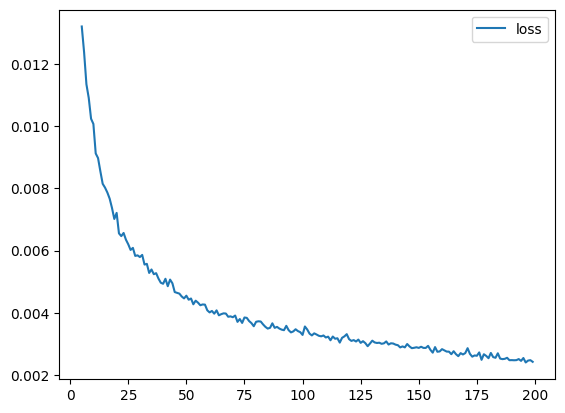

In [16]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot();

Time to Animate and experiment with different learning rates, batch sizes, and number of epamples!! :)


In [ ]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

